In [1]:
from trajopt import *

In [2]:
# Test case 1 -- almost replicating paper, working nonlinear example

J = np.diag([100, 100, 100]) # kg*m^2
x0 = np.array([0, 0, 0, 0.5, 0.5, 0.5, 0.5]) # [w_x, w_y, w_z, q_w, q_x, q_y, q_z]
xn = np.array([0, 0, 0, 0.0258, 0.0258, 0.0258, 0.999]) # [w_x, w_y, w_z, q_w, q_x, q_y, q_z]
c = np.array([[0.75, 0.433, 0.5]]).T
s = np.array([[0, 0, 1]]).T # Boresight along z
dt = 0.05
N = 100
abstol = 1e-3
theta = 40
print(theta)

trajectory = optimize_trajectory_nonlinear(x0, xn, dt, N, J, attiude_constraint=True, avoidance_angle=theta, c=c, s=s)

40
A: [[-0.26604444 -0.433       0.75        0.        ]
 [-0.433      -1.26604444  0.          0.75      ]
 [ 0.75        0.         -1.26604444  0.433     ]
 [ 0.          0.75        0.433      -0.26604444]], x0: [0.  0.  0.  0.5 0.5 0.5 0.5], xn: [0.     0.     0.     0.0258 0.0258 0.0258 0.999 ], s: [[0]
 [0]
 [1]], c: [[0.75 ]
 [0.433]
 [0.5  ]], theta: 0.6981317007977318, dt: 0.05 N: 100, J: [[100   0   0]
 [  0 100   0]
 [  0   0 100]]
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude constraints
Adding attitude cons

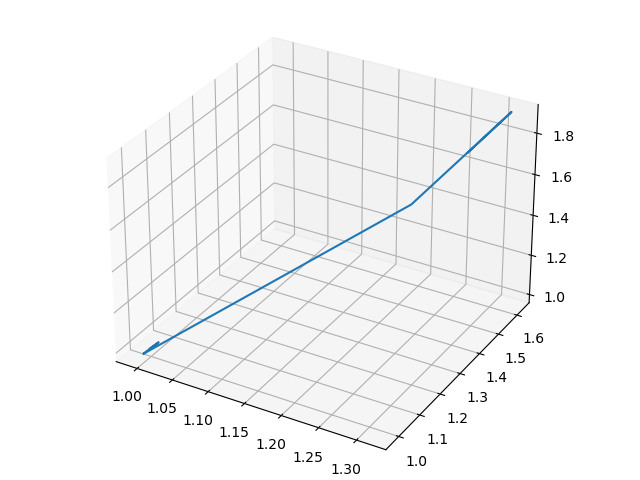

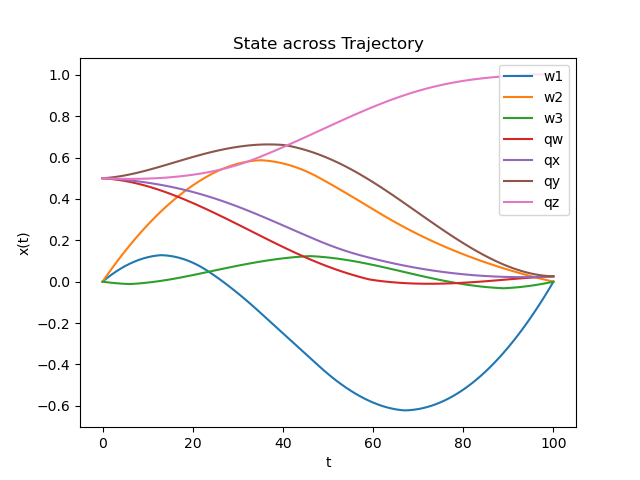

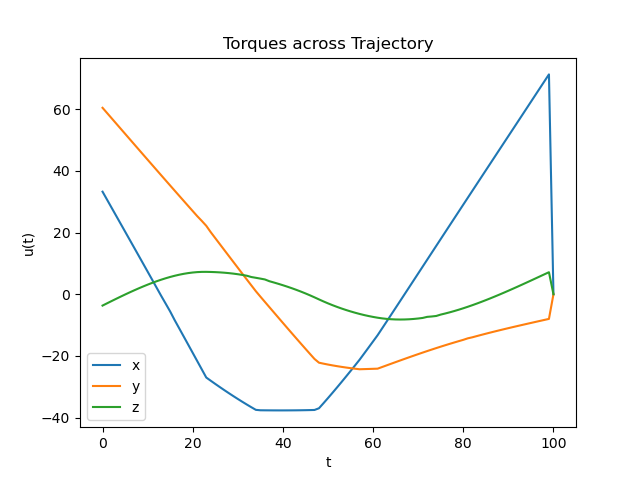

MovieWriter ffmpeg unavailable; using Pillow instead.


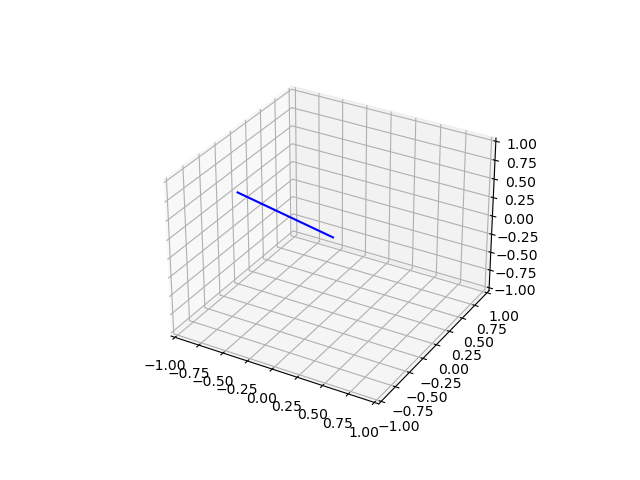

In [3]:
%matplotlib widget


x_opt = trajectory[1]
u_opt = trajectory[2]
# Calculate q space
qspace_vec = [qspace(x) for x in x_opt.transpose()]

x = [point[0] for point in qspace_vec]
y = [point[1] for point in qspace_vec]
z = [point[2] for point in qspace_vec]

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
plt.plot(x, y, z)
plt.title("Trajectory in Q Space")
plt.show()

plt.figure()
plt.plot(x_opt)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title("State across Trajectory")
plt.legend(["w1", "w2", "w3", "qw", "qx", "qy", "qz"])
plt.show()

plt.figure()
plt.plot(u_opt)
plt.xlabel('t')
plt.ylabel('u(t)')
plt.title("Torques across Trajectory")
plt.legend(["x", "y", "z"])
plt.show()

animate_quaternions(None, x_opt, c.T[0])
np.save("working_trajectory.npy", x_opt)